In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
#import seaborn as sns

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

# Collecting code LPP under the "100% Santé" plan

### Verification of L_SC1 titles who has been modified, erased or added between 2014 and 2024

#### First solution

In [3]:
diff = {}

for i in range(2024-2015):
    df1 = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{i+2014}.CSV", encoding='ISO-8859-1', sep=';')
    produits1 = df1["L_SC1"].unique().tolist()
    df2 = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{i+2014+1}.CSV", encoding='ISO-8859-1', sep=';')
    produits2 = df2["L_SC1"].unique().tolist()
    difference = list(set(produits1).difference(set(produits2)))
    key = f"{i+2014} - {i+2015}"
    diff[key] = difference

diff

{'2014 - 2015': [],
 '2015 - 2016': ['ACCESSOIRES DE PRODUITS INSCRITS AU TITRE III'],
 '2016 - 2017': [],
 '2017 - 2018': [],
 '2018 - 2019': [],
 '2019 - 2020': [],
 '2020 - 2021': ['DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPE',
  'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
  'ACCESSOIRES DE PRODUITS INSCRITS AU TITRE III',
  'PODO-ORTHESES',
  'DISPOSITIFS MEDICAUX UTILISES DANS LE SYST CARDIO-VASCULAIRE',
  'IMPLANTS ISSUS DE DERIVES HUMAINS-GREFFONS'],
 '2021 - 2022': ['CODES ARRIVES A ECHEANCE'],
 '2022 - 2023': []}

#### Or you could get a list of the different L_SC1 through the years, useable whenever you want

In [5]:
def finding_unique_LPP():
    unique_values=[]
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        values = df["L_SC1"].unique().tolist()
        for value in values:
            if value in unique_values:
                pass
            else:
                unique_values.append(value)

    return unique_values

## Optical

### Getting the interesting L_SC1 titles

*avant tout il faut regarder si on prend bien tout les l_SC1 en compte parce qu'il y a eu des ajouts, suppressions et modif toutes ces années*

In [6]:
produits = finding_unique_LPP()

In [7]:
produits

['DM, MATERIELS ET PRODUITS POUR LE TRAITEMENT DE PATHOLOGIES SPECIFIQUES',
 'DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPE',
 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
 'ACCESSOIRES DE PRODUITS INSCRITS AU TITRE III',
 'CODES ARRIVES A ECHEANCE',
 'ORTHESES',
 'OPTIQUE MEDICALE',
 'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
 'PROTHESES EXTERNES NON ORTHOPEDIQUES',
 'PROTHESES OCULAIRES ET FACIALES',
 'PODO-ORTHESES',
 'DMI D ORIGINE SYNTHETIQUE',
 'DMI ISSUS DE DERIVES ORIGINE ANIMALE NON VIABLES OU EN COMPORTANT',
 'IMPLANTS ISSUS DE DERIVES HUMAINS-GREFFONS',
 'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS',
 'FAUTEUILS ROULANTS',
 'VEHICULES DIVERS',
 'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
 'APPAREIL GENERATEUR D AEROSOL',
 'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)',
 'ORTHOPROTHESES(CHAP.7)',
 'DISPOSITIFS MEDICAUX UTILISES DANS LE SYST CARDIO-VASCULAIRE',
 'DISPOSITIFS MEDICAUX UTILISES

In [8]:
optical_100 = []
produits_index = [6, 9]

for i in range(len(produits_index)):
    optical_100.append(produits[produits_index[i]])

print(optical_100) #we got 2 interesting L_SC1 title which seem to be eligible to the 100% Santé plan for optical field, we will clean it more precisely.

['OPTIQUE MEDICALE', 'PROTHESES OCULAIRES ET FACIALES']


### Trying to clean the part "PROTHESES OCULAIRES ET FACIALES"

In [9]:
df2023cplt = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_2023.CSV", encoding='ISO-8859-1', sep=';')

In [10]:
print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"]))
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"].tail(3)
#we can notice that there are some shipping fees, we will look if we can disregard those.

943


,TITRE,L_TITRE,SC1,L_SC1,SC2,L_SC2,CODE_LPP,L_CODE_LPP,AGE,SEXE,BEN_REG,PSP_SPE,QTE,REM,BSE
729418,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,76,15,74,1710.00,1710.00
729419,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,76,90,22,718.00,718.00
729420,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,93,15,23,483.19,483.19


In [11]:
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"]["L_SC2"].unique()

array(['PROTHESES OCULAIRES', 'PROTHESES FACIALES',
       'FRAIS D EXPEDITION ET FRAIS ACCESSOIRES'], dtype=object)

In [12]:
print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]))

916


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\235692083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]))


In [13]:
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]["L_CODE_LPP"].unique() 
#we figure out that this is not as precise as we would want, but we will keep all that points for the optical field (where L_SC1 = PROTHESES OCULAIRE ET FACIALES)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\202664890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]["L_CODE_LPP"].unique()


array(['PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT SUR MESURE',
       'PROTHESE OCULAIRE PROVISOIRE SUR GABARIT',
       "PROTHESE OCULAIRE DEFINITIVE DE RECOUVREMENT AVEC PRISE D'EMPREINTE",
       "PROTHESE OCULAIRE PROVISOIRE AVEC PRISE D'EMPREINTE",
       'PROTHESE OCULAIRE, RENOUVELLEMENT AVEC REPRISE DU CONTRE-TYPE INITIAL',
       'PROTHESE OCULAIRE ORGANIQUE, REPOLISSAGE',
       'PROTHESE OCULAIRE RECOUVRT, RENOUVT SANS PRISE EMPREINTE, +REPRISE MAITRE-MODELE',
       'PROTHESE OCULAIRE PROVISOIRE, TEST DE RECOUVREMENT, TEST DE TOLERANCE',
       "PROTHESE OCULAIRE, RENOUVELLEMENT AVEC PRISE D'EMPREINTE COMPLEMENTAIRE",
       'PROTHESE OCULAIRE PALPEBRO-ORBITAIRE, SUR DEVIS',
       "PROTHESE OCULAIRE DEFINITIVE AVEC PRISE D'EMPREINTE",
       'VERRE SCLERAL PERMEABLE OXYGENE, LAO, SPOT, RENOUVELLEMENT',
       "PROTHESE OCULAIRE, RENOUVELLEMENT AVEC PRISE D'EMPREINTE",
       'VERRE SCLERAL PERMEABLE OXYGENE, LAO, SPOT, PREMIERE MISE',
       "PROTHESE OCULAIRE DE RECOUV

In [14]:
final_mask = (df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES") & (df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS"))
print(len(df2023cplt[final_mask])) #we get back with 742 lines as expected with the 2nd cell above.

916


In [15]:
df_optical_2023 = df2023cplt[final_mask]
df_optical_2023.head()

,TITRE,L_TITRE,SC1,L_SC1,SC2,L_SC2,CODE_LPP,L_CODE_LPP,AGE,SEXE,BEN_REG,PSP_SPE,QTE,REM,BSE
728478,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,11,90,17,7905.75,8959.85
728479,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,84,90,35,17919.70,18446.75
728480,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,99,15,24,12649.20,12649.20
728481,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,99,90,23,11700.51,12941.65
728482,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,2,99,15,13,6851.65,6851.65


### Cleaning the dataframe of optical financement in 2014, to get the amounts of money

In [16]:
#we keep the column "REM" to calculate the financing because this is the money effectively gave by the "Sécurité Sociale"
df_optical_2023 = pd.DataFrame({
    "L_SC2" : df_optical_2023["L_SC2"],
    "CODE_LPP" : df_optical_2023["CODE_LPP"],
    "Quantity" : df_optical_2023["QTE"],
    "Financing" : df_optical_2023["REM"]
 })

In [17]:
df_optical_2023.reset_index(inplace=True)
df_optical_2023.drop(columns="index", inplace=True)
df_optical_2023.head()

,L_SC2,CODE_LPP,Quantity,Financing
0,PROTHESES OCULAIRES,2503780,17,7905.75
1,PROTHESES OCULAIRES,2503780,35,17919.70
2,PROTHESES OCULAIRES,2503780,24,12649.20
3,PROTHESES OCULAIRES,2503780,23,11700.51
4,PROTHESES OCULAIRES,2503780,13,6851.65


In [18]:
df_optical_2023["Total"] = df_optical_2023['Quantity']*df_optical_2023["Financing"]
df_optical_2023.head(5)

,L_SC2,CODE_LPP,Quantity,Financing,Total
0,PROTHESES OCULAIRES,2503780,17,7905.75,134397.75
1,PROTHESES OCULAIRES,2503780,35,17919.70,627189.50
2,PROTHESES OCULAIRES,2503780,24,12649.20,303580.80
3,PROTHESES OCULAIRES,2503780,23,11700.51,269111.73
4,PROTHESES OCULAIRES,2503780,13,6851.65,89071.45


In [19]:
sum = df_optical_2023["Total"].sum()
sum

927978230.53

### Ajusting the result to the inflation (September 2024)

In [20]:
optical_HICP = pd.read_csv("../data/HICP/HICP-Corrective-eye-glasses-and-contact-lenses-France-Annual-parts-per-1000.csv")
#optical_HICP = optical_HICP[optical_HICP["TIME PERIOD"]>=2014]
optical_HICP.head()

,DATE,TIME PERIOD,HICP - Corrective eye-glasses and contact lenses (ICP.A.FR.N.061310.4.INW)
0,1996-12-31,1996,0.0
1,1997-12-31,1997,0.0
2,1998-12-31,1998,0.0
3,1999-12-31,1999,0.0
4,2000-12-31,2000,0.0


In [21]:
def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"]>=year_initial_price]
    for i in range(len(df)):
        initial_price = initial_price*(1+(df.iloc[i, 2]/1000))
    return initial_price

In [22]:
adjusted = adjusted_price(optical_HICP, sum, 2023)

In [23]:
print(adjusted-sum)

11262493.632813692


### Automation of this processus for every year :

In [24]:
optical_expenditures = {} #{2014:300000, 2015:493000,...}

def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"]>=year_initial_price]
    for i in range(len(df)): #calculating the equivalent for the last year of the df (2024)
        initial_price = initial_price*(1+(df.iloc[i, 2]/1000))
    return initial_price

def gov_optical_exp(inflation_adjustment):
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        final_mask = (df["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES") & (df["L_SC2"].str.contains("OCULAIRES|FRAIS"))
        #print(i+2014)
        df = df[final_mask]
        df = pd.DataFrame({
        "L_SC2" : df["L_SC2"],
        "CODE_LPP" : df["CODE_LPP"],
        "Quantity" : df["QTE"],
        "Financing" : df["REM"]
        })
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df["Total"] = df['Quantity']*df["Financing"]
        sum = df["Total"].sum()
        key = str(i+2014)

        if inflation_adjustment==True:
            optical_expenditures[key]=adjusted_price(optical_HICP, sum, i+2014)
            #print("test")
        else:
            optical_expenditures[key]=sum
            
    return optical_expenditures


In [25]:
optical_expenditures_adjusted = gov_optical_exp(inflation_adjustment=True)
optical_expenditures_adjusted = copy.deepcopy(optical_expenditures_adjusted)
optical_expenditures_adjusted

{'2014': 271625239.4823752,
 '2015': 350053676.8175159,
 '2016': 472606275.0176801,
 '2017': 517245422.91221285,
 '2018': 571658023.3696367,
 '2019': 646966219.6028622,
 '2020': 647666447.3392395,
 '2021': 802013839.2139432,
 '2022': 867350838.3591918,
 '2023': 939240724.1628137}

In [26]:
optical_expenditures_non_adjusted = gov_optical_exp(inflation_adjustment=False)
optical_expenditures_non_adjusted

{'2014': 257674784.53000003,
 '2015': 332075200.08000004,
 '2016': 448333594.9,
 '2017': 493540776.92999995,
 '2018': 548612479.98,
 '2019': 624429990.09,
 '2020': 628600167.87,
 '2021': 782856285.6099999,
 '2022': 851585392.8199999,
 '2023': 927978230.53}

### Plotting our results

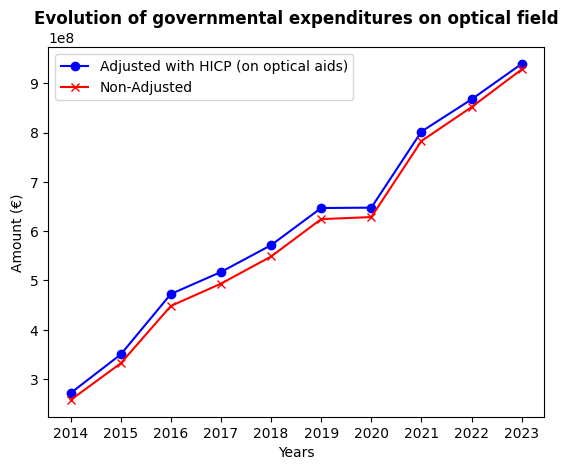

In [27]:
plt.plot(list(optical_expenditures_adjusted.keys()), list(optical_expenditures_adjusted.values()), marker="o", color="blue", label="Adjusted with HICP (on optical aids)")
plt.plot(list(optical_expenditures_non_adjusted.keys()), list(optical_expenditures_non_adjusted.values()), marker="x", color="red", label="Non-Adjusted")

plt.xlabel("Years")
plt.ylabel("Amount (€)")

plt.title("Evolution of governmental expenditures on optical field", fontweight="bold")
plt.legend()

We take aware of the fact that the trend is the same whether if we take in count the inflation rates or not.

We can deduce, in addition of the fact that the inflation don't touch a lot the health field, that the inflation is disregardable in general in the health field.

## Hearing

### Inflation adjustment

In [28]:
hearing_HICP = pd.read_csv("../data/HICP/HICP-Hearing-aids-France-Annual-parts-per-1000.csv")
hearing_HICP = hearing_HICP[hearing_HICP["TIME PERIOD"]>=2014]
hearing_HICP.head()
#clearly disregardable, because the HICP's unit is "parts per 1000", so for example, the inflation from 2015 to 2016 equals to 0,07%.
#moreover, as we can see just above this cell, the inflation rates don't have a lot of impact on health field prices

#we had foreseen that with optical field

,DATE,TIME PERIOD,HICP - Hearing aids (ICP.A.FR.N.061320.4.INW)
18,2014-12-31,2014,0.00
19,2015-12-31,2015,0.00
20,2016-12-31,2016,0.70
21,2017-12-31,2017,0.76
22,2018-12-31,2018,0.79


### Looking for the interesting fields

not so good to find the elements that fits in X field, because I can't see all of the years so the modifications, adds, ... I have to fix it

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy

In [30]:
dfH2023 = pd.read_csv("../Open-LPP-data/base_complete/OPEN_LPP_2023.CSV", encoding='ISO-8859-1', sep=';')
produits = dfH2023["L_SC1"].unique().tolist() #return a list of the L_SC1 title of all the product and prestation in the df
produits

['DM, MATERIELS ET PRODUITS POUR LE TRAITEMENT DE PATHOLOGIES SPECIFIQUES',
 'DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPES',
 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
 'CODES ARRIVES A ECHEANCE',
 'ORTHESES',
 'OPTIQUE MEDICALE',
 'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS',
 'PROTHESES EXTERNES NON ORTHOPEDIQUES',
 'PROTHESES OCULAIRES ET FACIALES',
 'PODO_ORTHESES',
 'DMI D ORIGINE SYNTHETIQUE',
 'DMI ISSUS DE DERIVES ORIGINE ANIMALE NON VIABLES OU EN COMPORTANT',
 'IMPLANTS ISSUS DE DERIVES HUMAINS_GREFFONS',
 'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS',
 'FAUTEUILS ROULANTS',
 'VEHICULES DIVERS',
 'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
 'DISPOSITIFS MEDICAUX UTILISES EN NEUROLOGIE',
 'DISPOISTIFS MEDICAUX UTILISES DANS LE SYSTEME CARDIO_VASCULAIRE',
 'DISPOSITIFS MEDICAUX UTILISES EN ONCOLOGIE',
 'DISPOSITIFS MEDICAUX UTILISES DANS LE SYSTEME GASTRO-INTESTINAL',
 'DISPOSITIFS MED

don't forget the labels that has been modified, added or erased between 2014 and 2024.

In [31]:
hearing_100 = []
produits_index = [6]

for i in range(len(produits_index)):
    hearing_100.append(produits[produits_index[i]])

print(hearing_100) #we got 2 interesting L_SC1 title which seem to be eligible to the 100% Santé plan for optical field, we will clean it more precisely.

['AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS']


In [32]:
dfH2023[dfH2023["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS"]["L_SC2"].unique()

array(['AUDIOPROTHESES, PATIENTS AU DELA DU 20EME ANNIVERSAIRE',
       'ALLOCATION FORFAITAIRE RELATIVE AUX PILES',
       'SYSTEME AUDITIF A CONDUCTION OSSEUSE SUR ADHESIF',
       'AUDIOPROTHESES, ENTRETIEN ET REPARATION',
       'ENTRETIEN ET REPARATIONS (PROCESSEURS IMPLANTS COCHLEAIRES ET DU TRONC CEREBRAL)',
       'PROCESSEURS,ACCES.REPARATIONS PR PROTHESES AUDIT. OSTEO-INTEGREES IMPLANTS OREIL',
       'AIDE AUDITIVE POUR LES PERSONNES AU-DELA DE LEUR 20EME ANNIVERSAIRE',
       'AIDES AUDITIVES-PERSONNES <= 20 ANS OU PERSONNES ATTEINTES DE CECITE',
       'GESTION ADMINISTRATIVE - PRESTATIONS DE SUIVI POUR UTILISATION D 1 AIDE AUDITIVE'],
      dtype=object)

All of that seems to fit in the case "Hearing"

In [33]:
dfH2023 = dfH2023[dfH2023["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS"]

### Cleaning data

In [34]:
#we keep the column "REM" to calculate the financing because this is the money effectively gave by the "Sécurité Sociale"
dfH2023 = pd.DataFrame({
    "L_SC2" : dfH2023["L_SC2"],
    "CODE_LPP" : dfH2023["CODE_LPP"],
    "Quantity" : dfH2023["QTE"],
    "Financing" : dfH2023["REM"]
 })

In [35]:
dfH2023.reset_index(inplace=True)
dfH2023.drop(columns="index", inplace=True)
dfH2023.head()

,L_SC2,CODE_LPP,Quantity,Financing
0,"AUDIOPROTHESES, PATIENTS AU DELA DU 20EME ANNI...",2335791,20,6524.87
1,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2317149,39,36.30
2,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,66,61.20
3,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,127,134.70
4,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,96,56.40


In [36]:
dfH2023["Total"] = dfH2023['Quantity']*dfH2023["Financing"]
dfH2023.head(5)

,L_SC2,CODE_LPP,Quantity,Financing,Total
0,"AUDIOPROTHESES, PATIENTS AU DELA DU 20EME ANNI...",2335791,20,6524.87,130497.4
1,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2317149,39,36.30,1415.7
2,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,66,61.20,4039.2
3,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,127,134.70,17106.9
4,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,96,56.40,5414.4


In [37]:
sum = dfH2023["Total"].sum()
sum

497231768216.13

In [38]:
def gov_hearing_exp(inflation_adjustment): #I suppose we can make a function that is able to makes the difference when I want to use it for optical or hearing or ... field, but I don't have much time at this moment, I've to look for it later..
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        final_mask = (df["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS") | (df["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR")
        #print(i+2014)
        df = df[final_mask]
        df = pd.DataFrame({
        "L_SC2" : df["L_SC2"],
        "CODE_LPP" : df["CODE_LPP"],
        "Quantity" : df["QTE"],
        "Financing" : df["REM"]
        })
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df["Total"] = df['Quantity']*df["Financing"]
        sum = df["Total"].sum()
        key = str(i+2014)

        if inflation_adjustment==True:
            optical_expenditures[key]=adjusted_price(optical_HICP, sum, i+2014)
            #print("test")
        else:
            optical_expenditures[key]=sum
            
    return optical_expenditures

In [39]:
hearing_expenditures_adjusted = gov_hearing_exp(inflation_adjustment=True)
hearing_expenditures_adjusted = copy.deepcopy(hearing_expenditures_adjusted)
hearing_expenditures_adjusted

{'2014': 1204972738253.7412,
 '2015': 1487541849576.8667,
 '2016': 1599893421373.7224,
 '2017': 1809580821081.9968,
 '2018': 2008212193960.5957,
 '2019': 924292812155.6421,
 '2020': 894773931726.1978,
 '2021': 463144180933.29926,
 '2022': 527528658898.48486,
 '2023': 503266467565.0236}

In [40]:
hearing_expenditures_non_adjusted = gov_hearing_exp(inflation_adjustment=False)
hearing_expenditures_non_adjusted

{'2014': 1143086302604.8198,
 '2015': 1411142890474.83,
 '2016': 1517724175445.0,
 '2017': 1726650222105.52,
 '2018': 1927254104754.19,
 '2019': 892096270325.9701,
 '2020': 868433197364.91,
 '2021': 452081143066.92,
 '2022': 517940008061.4601,
 '2023': 497231768216.13}

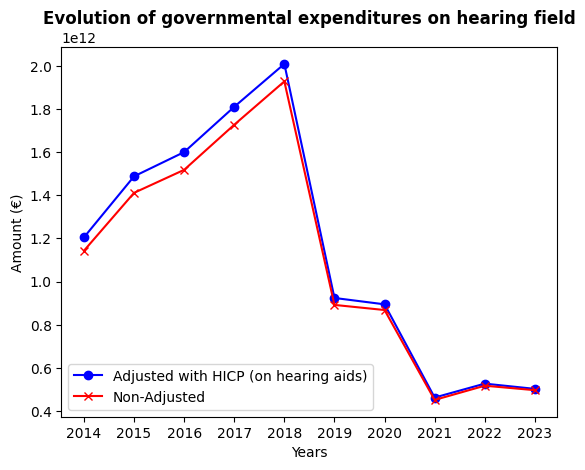

In [41]:
plt.plot(list(hearing_expenditures_adjusted.keys()), list(hearing_expenditures_adjusted.values()), marker="o", color="blue", label="Adjusted with HICP (on hearing aids)")
plt.plot(list(hearing_expenditures_non_adjusted.keys()), list(hearing_expenditures_non_adjusted.values()), marker="x", color="red", label="Non-Adjusted")

plt.xlabel("Years")
plt.ylabel("Amount (€)")

plt.title("Evolution of governmental expenditures on hearing field", fontweight="bold")
plt.legend()

Results are pretty weird .. So I'm not really confident on what I did here

## Dental

In [42]:
unique_values = finding_unique_LPP()

Dental sector isn't in LPP dataset

# Whole health field

# New analyses after cleaning precisely data

## Different tries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
#import seaborn as sns

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

### DiD on code_LPP under 100% Santé plan and code_LPP that isn't in it but is in the field that we are working on.

#### Optical field

In [44]:
import json

with open('../data/potential_100Santé.json', 'r') as file:
    data = json.load(file)

In [49]:
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

In [50]:
from functions import gov_exp

In [44]:
classe_A = gov_exp(inflation_adjustment=False, sector="optical", mask={"CLASSE A":["contains", "L_CODE_LPP"]})

2014
                                               L_CODE_LPP
208822  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208823  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208824  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208825  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208826  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208827  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208828  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208829  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208830  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
208831  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
2015
                                               L_CODE_LPP
211385  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
211386  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
211387  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
211388  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
211389  AUDIOPROTHESE, APPAREIL DE CLASSE A, > OU = 20...
2113

In [45]:
whole_optical = gov_exp(inflation_adjustment=False, sector="optical", mask={"OPTIQUE MEDICALE":["equality", "L_SC1"]})

2014
                                               L_CODE_LPP
200867  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200868  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200869  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200870  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200871  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200872  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200873  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200874  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200875  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
200876  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
2015
                                               L_CODE_LPP
203321  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
203322  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
203323  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
203324  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
203325  VERRE BLANC SIMPLE FOYER, <18 ANS, CYLINDRE <O...
2033

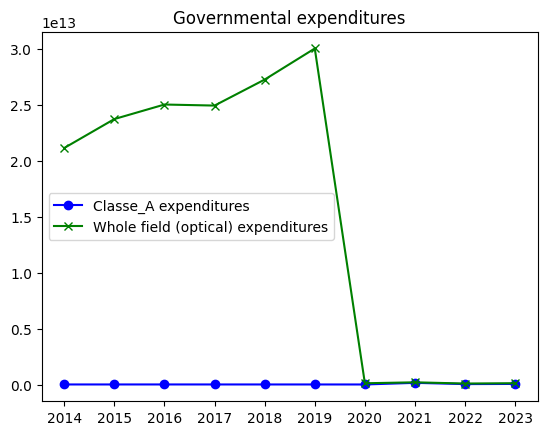

In [46]:
plt.plot(list(classe_A[0].keys()), list(classe_A[0].values()), color="blue", label="Classe_A expenditures", marker="o")
plt.plot(list(whole_optical[0].keys()), list(whole_optical[0].values()), color="green", label="Whole field (optical) expenditures", marker="x")

plt.xlabel = "Year"
plt.ylabel = "Amout (€)"

plt.legend()
plt.title(label="Governmental expenditures")
plt.show()

Need to be normalized, so we will be able to compare the trend.

In [47]:
from typing import List
import numpy as np

def normalized_by_mean(list : List[int]):
    normalized_list = []
    mean=np.mean(list)
    for int in list:
        int = int/mean
        normalized_list.append(int)

    return normalized_list

values_A = list(classe_A[0].values())
values_B = list(whole_optical[0].values())
values_A_LPP_codes = list(classe_A[1].values())
values_B_LPP_codes = list(whole_optical[1].values())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


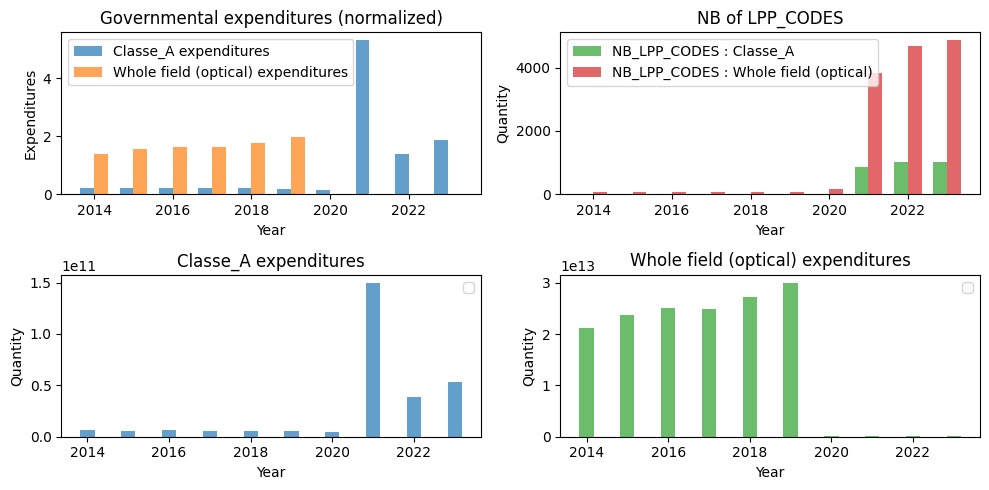

In [48]:
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

ax1, ax2 = axes[0, 0], axes[0, 1]
ax3, ax4 = axes[1, 0], axes[1, 1]

years_A = np.array([int(year) for year in classe_A[0].keys()])
years_B = np.array([int(year) for year in whole_optical[0].keys()])

ax1.bar(years_A - width/2, normalized_by_mean(values_A), width=width, color="#1f77b4", label="Classe_A expenditures", alpha=0.7)
ax1.bar(years_B + width/2, normalized_by_mean(values_B), width=width, color="#ff7f0e", label="Whole field (optical) expenditures", alpha=0.7)

ax1.set_title('Governmental expenditures (normalized)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Expenditures')
ax1.legend()

years_A_LPP = np.array([int(year) for year in classe_A[1].keys()])
years_B_LPP = np.array([int(year) for year in whole_optical[1].keys()])

ax2.bar(years_A_LPP - width/2, values_A_LPP_codes, width=width, color="#2ca02c", label="NB_LPP_CODES : Classe_A", alpha=0.7)
ax2.bar(years_B_LPP + width/2, values_B_LPP_codes, width=width, color="#d62728", label="NB_LPP_CODES : Whole field (optical)", alpha=0.7)

ax2.set_title('NB of LPP_CODES')
ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity')
ax2.legend()

ax3.bar(years_A_LPP, values_A, width=width, color="#1f77b4", alpha=0.7)

ax3.set_title('Classe_A expenditures')
ax3.set_xlabel('Year')
ax3.set_ylabel('Quantity')
ax3.legend()

ax4.bar(years_A_LPP, values_B, width=width, color="#2ca02c", alpha=0.7)

ax4.set_title('Whole field (optical) expenditures')
ax4.set_xlabel('Year')
ax4.set_ylabel('Quantity')
ax4.legend()

plt.tight_layout()
plt.show()


We can see that the government doesn't finance anymore the items who aren't in "Classe_A"

### DiD on code_LPP under 100% Santé (optical) plan and All fields' in LPP database (optical, hearing)

In [49]:
importlib.reload(functions)
from functions import gov_exp
whole = gov_exp(inflation_adjustment=False, sector="all", mask={})

values_B = list(whole[0].values())
values_B_LPP_codes = list(whole[1].values())

                                          L_CODE_LPP
0  FRA-38, VENTILATION ASSISTEE, < 12 HEURES + OX...
1  FRA-38, VENTILATION ASSISTEE, < 12 HEURES + OX...
2  FRA-38, VENTILATION ASSISTEE, < 12 HEURES + OX...
3  FRA-12, VENTILATION ASSISTEE, TRACHEOTOMISES +...
4  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
5  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
6  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
7  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
8  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
9  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
                                          L_CODE_LPP
0  FRA-38, VENTILATION ASSISTEE, < 12 HEURES + OX...
1  FRA-38, VENTILATION ASSISTEE, < 12 HEURES + OX...
2  FRA-38, VENTILATION ASSISTEE, < 12 HEURES + OX...
3  FRA-12, VENTILATION ASSISTEE, TRACHEOTOMISES +...
4  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
5  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A DO...
6  ASPIRATEUR TRACHEAL, FORFAIT DE LIVRAISON A

In [50]:
values_B_LPP_codes

[1783, 1784, 1948, 2069, 2195, 2446, 6529, 10939, 11861, 11981]

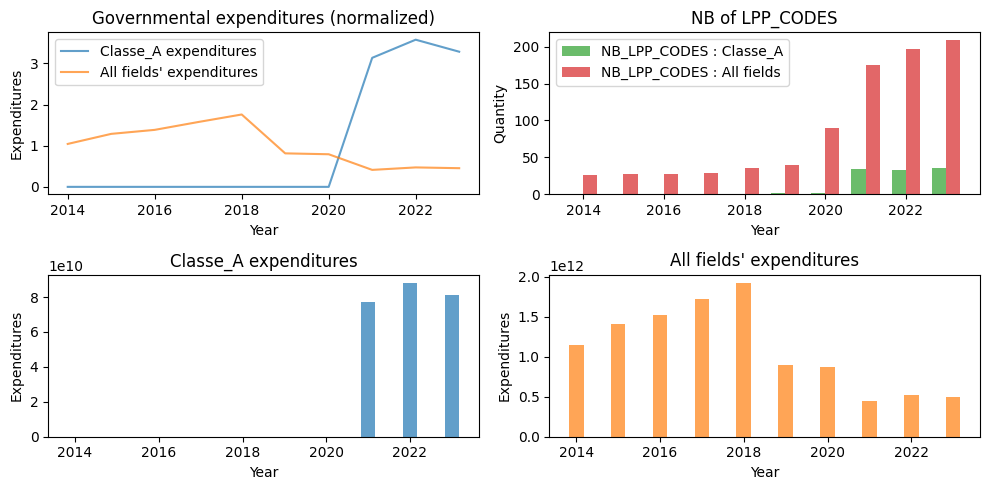

In [61]:
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

ax1, ax2 = axes[0, 0], axes[0, 1]
ax3, ax4 = axes[1, 0], axes[1, 1]

years_A = np.array([int(year) for year in classe_A[0].keys()])
years_B = np.array([int(year) for year in whole[0].keys()])

ax1.plot(years_A, normalized_by_mean(values_A), color="#1f77b4", label="Classe_A expenditures", alpha=0.7)
ax1.plot(years_B, normalized_by_mean(values_B), color="#ff7f0e", label="All fields' expenditures", alpha=0.7)

ax1.set_title('Governmental expenditures (normalized)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Expenditures')
ax1.legend()

years_A_LPP = np.array([int(year) for year in classe_A[1].keys()])
years_B_LPP = np.array([int(year) for year in whole[1].keys()])

ax2.bar(years_A_LPP - width/2, values_A_LPP_codes, width=width, color="#2ca02c", label="NB_LPP_CODES : Classe_A", alpha=0.7)
ax2.bar(years_B_LPP + width/2, values_B_LPP_codes, width=width, color="#d62728", label="NB_LPP_CODES : All fields", alpha=0.7)

ax2.set_title('NB of LPP_CODES')
ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity')
ax2.legend()

ax3.bar(years_A, values_A, width=width, color="#1f77b4", alpha=0.7)

ax3.set_title("Classe_A expenditures")
ax3.set_xlabel('Year')
ax3.set_ylabel('Expenditures')

ax4.bar(years_B, values_B, width=width, color="#ff7f0e", alpha=0.7)

ax4.set_title("All fields' expenditures")
ax4.set_xlabel('Year')
ax4.set_ylabel('Expenditures')

plt.tight_layout()
plt.show()

We see that, here, expenditures are not getting down at all, so we suppose that hearing field keep a certain amount of financement from government. We will verify it below.

### DiD on "classe I" expenditures and whole hearin field

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import json
import importlib
import functions

In [53]:
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

In [54]:
classeI_hearing = gov_exp(inflation_adjustment=False, sector="hearing", mask={"AUDIOPROTHESES":["contains", "L_SC1", "or"],"CLASSE I":["contains", "L_CODE_LPP", "and"]})

2014
2014
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2015
2015
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2016
2016
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2017
2017
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2018
2018
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2019
2019
                                       L_CODE_LPP
257283  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS
257284  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS
257285  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS
257286  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS
257287  AIDE AUDITIVE, CLASSE I, GAUCHE, > 20 ANS
257288  AIDE AUDITIVE, CLASSE I, GAUCHE, > 20 ANS
257289  AIDE AUDITIVE, CLASSE I, GAUCHE, > 20 ANS
257290  AIDE AUDITIVE, CLASSE I, GAUCHE, > 20 ANS
2020
2020
                                       L_CODE_LPP
533804  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS
533805  AIDE AUDITIVE, CLASSE I, GAUCHE, > 20 ANS
2021
2021
                                       L_CODE_LPP
685920  AIDE AUDITIVE, CLASSE 

In [55]:
whole_hearing = gov_exp(inflation_adjustment=False, sector="hearing", mask={"AUDIOPROTHESES":["contains", "L_SC1", "or"]})

2014
                                               L_CODE_LPP
208488  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208489  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208490  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208491  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208492  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208493  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208494  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208495  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208496  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
208497  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
2015
                                               L_CODE_LPP
211048  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
211049  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
211050  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
211051  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
211052  AUDIOPROTHESE, APPAREIL DE CLASSE D, > OU = 20...
2110

In [56]:
classeI_hearing

({'2014': 0.0,
  '2015': 0.0,
  '2016': 0.0,
  '2017': 0.0,
  '2018': 0.0,
  '2019': 1776096.0,
  '2020': 136368.0,
  '2021': 77430417977.13,
  '2022': 88320184593.1,
  '2023': 81105340535.70999},
 {'2014': 0,
  '2015': 0,
  '2016': 0,
  '2017': 0,
  '2018': 0,
  '2019': 2,
  '2020': 2,
  '2021': 34,
  '2022': 33,
  '2023': 36})

In [57]:
whole_hearing

({'2014': 1143086302604.8198,
  '2015': 1411142890474.83,
  '2016': 1517724175445.0,
  '2017': 1726650222105.52,
  '2018': 1927254104754.19,
  '2019': 892096270325.9701,
  '2020': 868433197364.91,
  '2021': 452081143066.92,
  '2022': 517940008061.4601,
  '2023': 497231768216.13},
 {'2014': 26,
  '2015': 28,
  '2016': 27,
  '2017': 29,
  '2018': 35,
  '2019': 40,
  '2020': 90,
  '2021': 175,
  '2022': 197,
  '2023': 209})

In [58]:
years_A = np.array([int(year) for year in classeI_hearing[0].keys()])
years_B = np.array([int(year) for year in whole_hearing[0].keys()])

values_A = list(classeI_hearing[0].values())
values_B = list(whole_hearing[0].values())

values_A_LPP_codes = classeI_hearing[1].values()
values_B_LPP_codes = whole_hearing[1].values()

In [59]:
from functions import normalized_by_mean

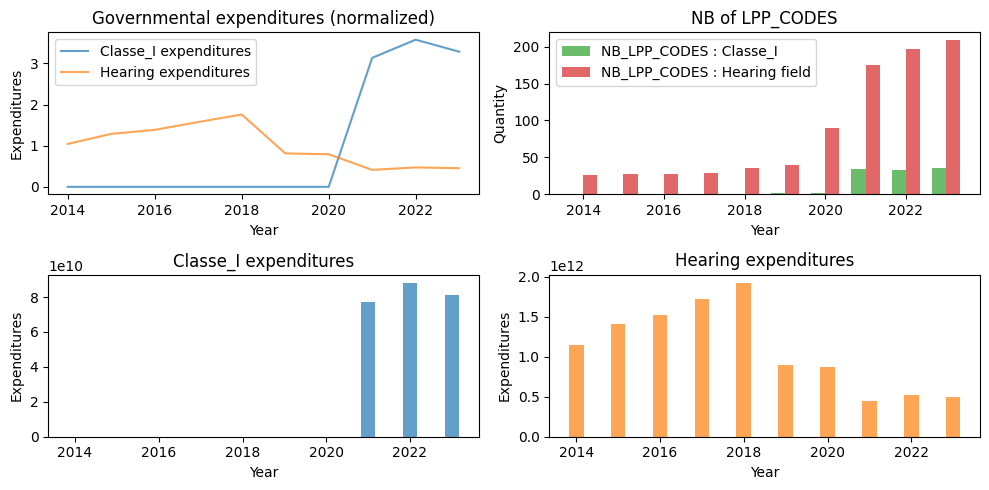

In [60]:
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

ax1, ax2 = axes[0, 0], axes[0, 1]
ax3, ax4 = axes[1, 0], axes[1, 1]

ax1.plot(years_A, normalized_by_mean(values_A), color="#1f77b4", label="Classe_I expenditures", alpha=0.7)
ax1.plot(years_B, normalized_by_mean(values_B), color="#ff7f0e", label="Hearing expenditures", alpha=0.7)

ax1.set_title('Governmental expenditures (normalized)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Expenditures')
ax1.legend()

ax2.bar(years_A - width/2, values_A_LPP_codes, width=width, color="#2ca02c", label="NB_LPP_CODES : Classe_I", alpha=0.7)
ax2.bar(years_B + width/2, values_B_LPP_codes, width=width, color="#d62728", label="NB_LPP_CODES : Hearing field", alpha=0.7)

ax2.set_title('NB of LPP_CODES')
ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity')
ax2.legend()

ax3.bar(years_A, values_A, width=width, color="#1f77b4", alpha=0.7)

ax3.set_title("Classe_I expenditures")
ax3.set_xlabel('Year')
ax3.set_ylabel('Expenditures')

ax4.bar(years_B, values_B, width=width, color="#ff7f0e", alpha=0.7)

ax4.set_title("Hearing expenditures")
ax4.set_xlabel('Year')
ax4.set_ylabel('Expenditures')

plt.tight_layout()
plt.show()

pour normalized, vaut mieux faire un graphique à points jpense, pcq c'est la tendance qu'on veut voir

voir selon les marques ?

## Brand comparison

In [63]:
import json
with open('../data/potential_100Santé.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [74]:
#L_SC1 to keep, to get the brands informations that interest us
processeur = ["AIDE AUDITIVE POUR LES PERSONNES AU-DELA DE LEUR 20EME ANNIVERSAIRE", "AIDES AUDITIVES-PERSONNES <= 20 ANS OU PERSONNES ATTEINTES DE CECITE"]
processeurs = ["AIDE AUDITIVE POUR LES PERSONNES AU-DELA DE LEUR 20EME ANNIVERSAIRE", "AIDES AUDITIVES-PERSONNES <= 20 ANS OU PERSONNES ATTEINTES DE CECITE"]

In [83]:
interesting_keys =["AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR", "AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS"]
brands = []
count = 0

for key in interesting_keys:
    if count==0:
        for sc1 in processeur:
            filtered = data[key][sc1]
            for element in filtered:
                parts = element.split(",")
                brand = parts[-1].strip()
                if brand in brands:
                    pass
                else:
                    brands.append(brand)
        count += 1
    else:
        for sc1 in processeurs:
            filtered = data[key][sc1]
            for element in filtered:
                parts = element.split(",")
                brand = parts[-1].strip()
                if brand in brands:
                    pass
                else:
                    brands.append(brand)
print(brands)

['> 20 ANS', 'STARKEY FRANCE', 'SONOVA FRANCE', 'PRODITION', 'WIDEX', 'SIVANTOS', 'GN HEARING SAS', 'BIOTONE TECH', '<= A 20 ANS', '<= 20 ANS', 'SUPERVISION SAS', 'MEDISOUND', 'SIGNIA', 'GAUCHE <= A 20 ANS']


In [84]:
brands_to_remove = [0, 8, 9, 13]
for int in sorted(brands_to_remove, reverse=True):
    del brands[int]
print(brands)

['STARKEY FRANCE', 'SONOVA FRANCE', 'PRODITION', 'WIDEX', 'SIVANTOS', 'GN HEARING SAS', 'BIOTONE TECH', 'SUPERVISION SAS', 'MEDISOUND', 'SIGNIA']


In [86]:
brand_classI = []
for brand in brands:
    brand_ = brand.replace(" ", "_")
    variable = f"{brand_}_classI"
    variable = gov_exp(inflation_adjustment=False, sector="hearing", mask={"CLASSE I": ["contains", "L_CODE_LPP", "and"], str(brand): ["contains", "L_CODE_LPP", "and"]})
    brand_classI.append(variable)

2014
2014
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2015
2015
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2016
2016
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2017
2017
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2018
2018
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2019
2019
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2020
2020
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2021
2021
                                               L_CODE_LPP
686555  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686556  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686557  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686558  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686559  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686560  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686561  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686562  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
686563  AIDE AUDITIVE, CLASSE I, DROITE, > 20 ANS,STAR...
6865

In [92]:
count = 0
classI_brands_json = {}
for brand in brands:
    classI_brands_json[brand]=brand_classI[count]
    count +=1

classI_brands_json

{'STARKEY FRANCE': ({'2014': 0.0,
   '2015': 0.0,
   '2016': 0.0,
   '2017': 0.0,
   '2018': 0.0,
   '2019': 0.0,
   '2020': 0.0,
   '2021': 6039094965.379999,
   '2022': 10117942719.7,
   '2023': 19626629494.440002},
  {'2014': 0,
   '2015': 0,
   '2016': 0,
   '2017': 0,
   '2018': 0,
   '2019': 0,
   '2020': 0,
   '2021': 4,
   '2022': 4,
   '2023': 4}),
 'SONOVA FRANCE': ({'2014': 0.0,
   '2015': 0.0,
   '2016': 0.0,
   '2017': 0.0,
   '2018': 0.0,
   '2019': 0.0,
   '2020': 0.0,
   '2021': 12779776580.05,
   '2022': 31574435544.78,
   '2023': 25082190939.51},
  {'2014': 0,
   '2015': 0,
   '2016': 0,
   '2017': 0,
   '2018': 0,
   '2019': 0,
   '2020': 0,
   '2021': 4,
   '2022': 4,
   '2023': 4}),
 'PRODITION': ({'2014': 0.0,
   '2015': 0.0,
   '2016': 0.0,
   '2017': 0.0,
   '2018': 0.0,
   '2019': 0.0,
   '2020': 0.0,
   '2021': 28633914728.96,
   '2022': 24680360274.15,
   '2023': 16795411609.8},
  {'2014': 0,
   '2015': 0,
   '2016': 0,
   '2017': 0,
   '2018': 0,
   '2019': 

In [94]:
with open('../data/classI_gov_exp_for_different_brands_hearing_field', 'w', encoding='utf-8') as f:
    json.dump(classI_brands_json, f, ensure_ascii=False, indent=4)

In [93]:
brand_classII = []
for brand in brands:
    brand_ = brand.replace(" ", "_")
    variable = f"{brand_}_classII"
    variable = gov_exp(inflation_adjustment=False, sector="hearing", mask={"CLASSE II": ["contains", "L_CODE_LPP", "and"], str(brand): ["contains", "L_CODE_LPP", "and"]})
    brand_classII.append(variable)

2014
2014
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2015
2015
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2016
2016
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2017
2017
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2018
2018
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2019
2019
Empty DataFrame
Columns: [L_CODE_LPP]
Index: []
2020
2020
                                               L_CODE_LPP
534107  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534108  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534109  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534110  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534111  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534112  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534113  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534114  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534115  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
534116  AIDE AUDITIVE, CLASSE II, DROITE, > 20 ANS,STA...
2021

In [95]:
count = 0
classII_brands_json = {}
for brand in brands:
    classII_brands_json[brand]=brand_classII[count]
    count +=1

with open('../data/classII_gov_exp_for_different_brands_hearing_field', 'w', encoding='utf-8') as f:
    json.dump(classI_brands_json, f, ensure_ascii=False, indent=4)